# Welcome

##### In this notebook we are building various Supervised and Unsupervised Machine Learning models from scratch in Python.
##### We will then generate some dummy dataset and will train our model on that data set along with the scikit learn implemented models.
##### After that we will compare both the accuracies. 

#### Checking all the installed packages.

In [111]:
# !pip install numpy
# !pip install pandas
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install sklearn
# !pip install tensorflow
# !pip install keras
# !pip install pickle
# !pip install joblib
# !pip install streamlite

#### Importing the libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import seaborn as sns
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')


#### Building the preceptron class.
###### You can read more about perceptron here.
###### https://en.wikipedia.org/wiki/Perceptron

In [113]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to 1 and -1
        y_ = np.where(y > 0, 1, -1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                # Perceptron update rule
                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

#### Building the Logistic Regression class.
###### You can read more about Logistic Regression here.
###### https://en.wikipedia.org/wiki/Perceptron

In [114]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

#### Building the K-Nearest Neighbour class.
###### You can read more about Logistic Regression here.
###### https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [115]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Compute distances between x and all examples in the training set
            distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
            # Sort by distance and return indices of the first k neighbors
            k_indices = np.argsort(distances)[:self.k]
            # Extract the labels of the k nearest neighbor training samples
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            # Return the most common class label
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return predictions

#### Creating the dataset

In [116]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Visulization

In [117]:
df = pd.DataFrame(X_train)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.063926,-0.221042,0.189654,0.069370,0.564842,1.635798,-0.671868,2.392110,0.874895,0.192597
1,-1.884649,0.092055,-1.619239,0.476240,2.441222,0.437127,2.214412,-0.993593,2.234279,2.529928
2,0.531307,0.265362,0.371714,-0.582759,0.390465,-0.103222,-0.365368,-0.134279,-0.906845,-2.438817
3,0.292668,-0.707552,0.230376,-0.538790,-1.244486,0.449827,-0.279508,-1.125655,-0.415822,-0.720212
4,-0.101944,-0.221600,0.250126,-1.440982,-0.346772,-0.585793,-0.911652,1.127686,1.224270,0.958816


#### Visulazing the data

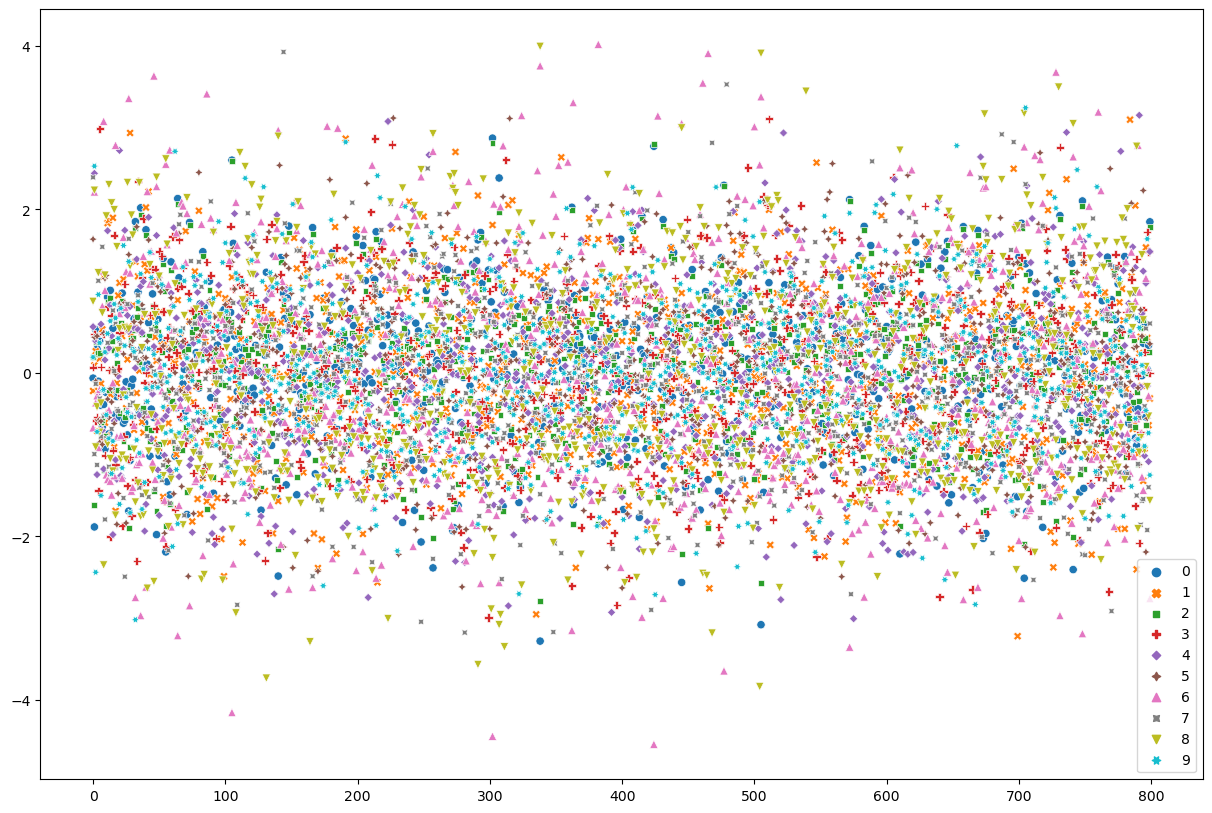

In [118]:
plt.figure(figsize= (15, 10))
sns.scatterplot(df)
plt.show()

#### Training the model.
###### Creating dictionary to store modelname and accuracy

In [119]:
my_dict = {}

#### Perceptron Trick

###### My Model

In [120]:
my_perceptron = Perceptron()
my_perceptron.fit(X_train, y_train)

predictions = my_perceptron.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
# print(f"My preceptron Accuracy: {accuracy * 100:.2f}%")
my_dict['my_perceptron'] = accuracy

###### SK-Learn Model

In [121]:
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron(tol=1e-3, random_state=0)
sk_perceptron.fit(X, y)


prediciton = sk_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, prediciton)
# print(f"SK-Learn preceptron Accuracy: {accuracy * 100:.2f}%")
my_dict['SK-Learn Perceptron'] = accuracy

#### Logistic Regerssion

###### My Model

In [122]:
log_reg = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg.fit(X_train, y_train)

predictions = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
# print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
my_dict['my_logistic_regression'] = accuracy

###### SK-Learn Model

In [123]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

predictions = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
# print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
my_dict['Sk-Learn_logistic_regression'] = accuracy

#### KNN

###### My Model

In [124]:
knn = KNN(k=3)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
# print(f"My KNN Accuracy: {accuracy * 100:.2f}%")
my_dict['my_knn'] = accuracy

In [125]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

# print(f"SK-Learn KNN Accuracy: {accuracy * 100:.2f}%")
my_dict['SK-Learn_knn'] = accuracy

In [126]:
my_dict

{'my_perceptron': 0.785,
 'SK-Learn Perceptron': 0.775,
 'my_logistic_regression': 0.825,
 'Sk-Learn_logistic_regression': 0.83,
 'my_knn': 0.79,
 'SK-Learn_knn': 0.79}

#### Plotting the accuracy of My Model along with SK-Learn Models

In [127]:

# Create Bar chart
fig = go.Figure(data=[go.Bar(
    x=list(my_dict.keys()), # get keys for x-axis
    y=list(my_dict.values()), # get values for y-axis
    marker_color=(00, 1, 2, 3, 4, 5)
)])

# Customize aspect
fig.update_layout(title_text='Category Counts', xaxis_title="Category", yaxis_title="Count")

fig.show()